# Supervised Machine Learning using Logistic Regression

**Introduction:**  
Diabetes is a chronic disease that occurs when the body cannot effectively regulate blood sugar levels. Early detection is crucial to prevent complications. In this assignment, we use the **PIMA Diabetes Dataset**, which contains diagnostic measurements such as glucose level, BMI, age, and insulin levels, to predict whether a patient has diabetes.  

**Objective:**  
The goal is to build a **Logistic Regression model** to classify patients as diabetic (Outcome = 1) or non-diabetic (Outcome = 0), perform exploratory data analysis, visualize patterns, evaluate the model, and extract insights for interpretation.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

sns.set(style='whitegrid')


In [45]:
# load dataset
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing

Replace zero values in important columns with median values to handle missing or invalid data.


In [46]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.fillna(df.median(), inplace=True)
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Exploratory Data Analysis (EDA)

Understand the distribution of the target variable and statistical summary of features.


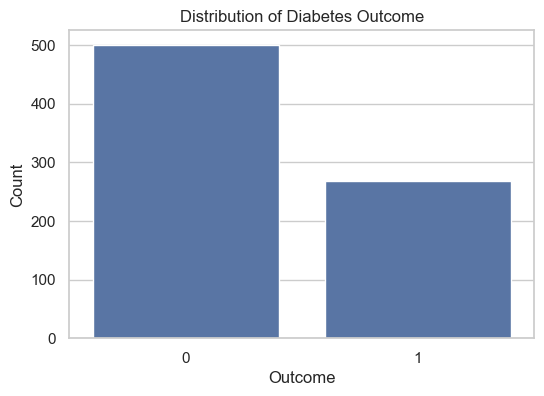

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Statistical summary
df.describe()


## Feature Distribution Analysis

Histograms were plotted for all numerical features to understand their 
distributions, skewness, and spread. This helps identify the need for 
data transformation or scaling.


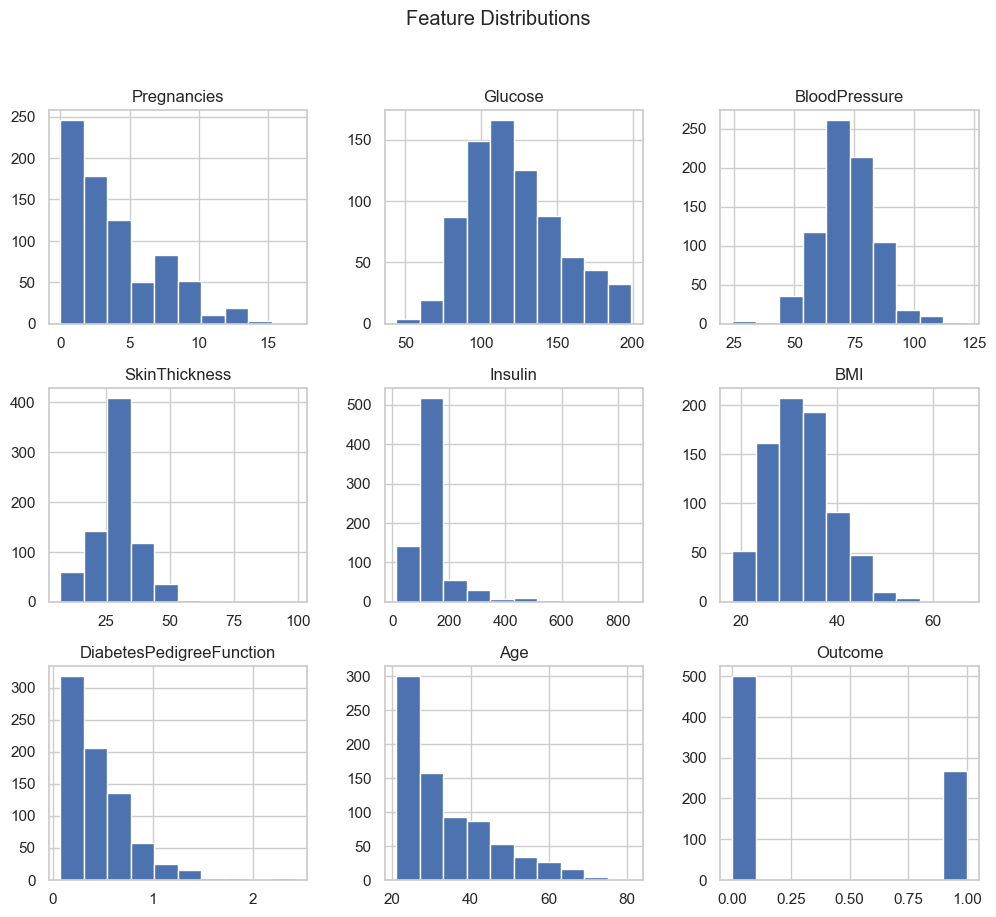

In [48]:
# Histograms for numerical features
df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()


## Feature Visualization

Visualize relationships between features and target using correlation heatmap and boxplots for individual features.


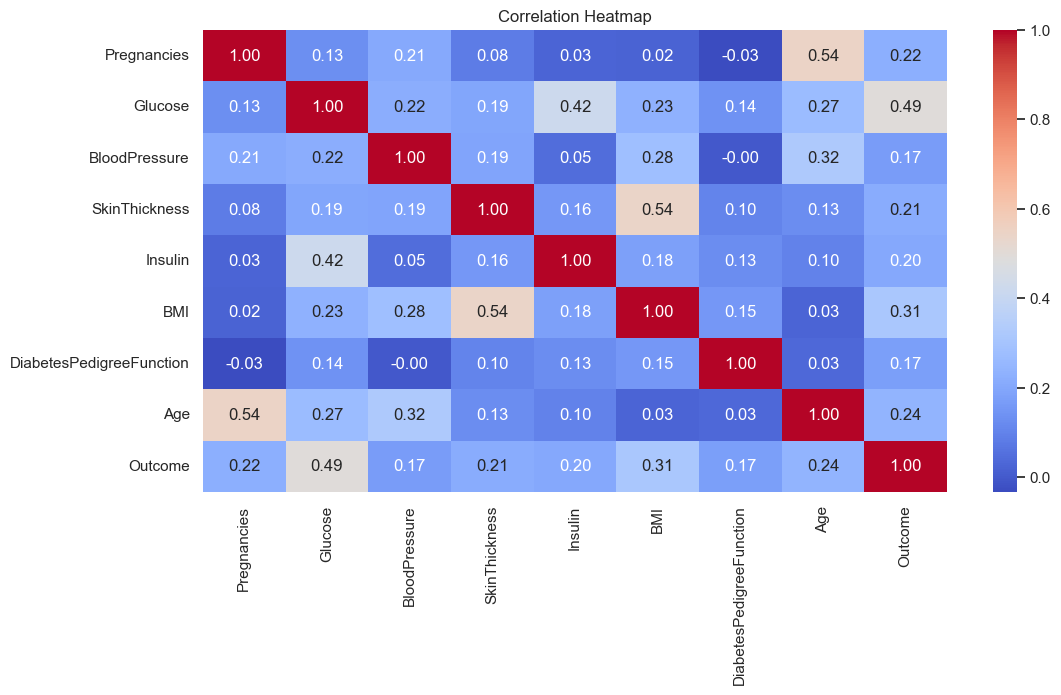

In [49]:
# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


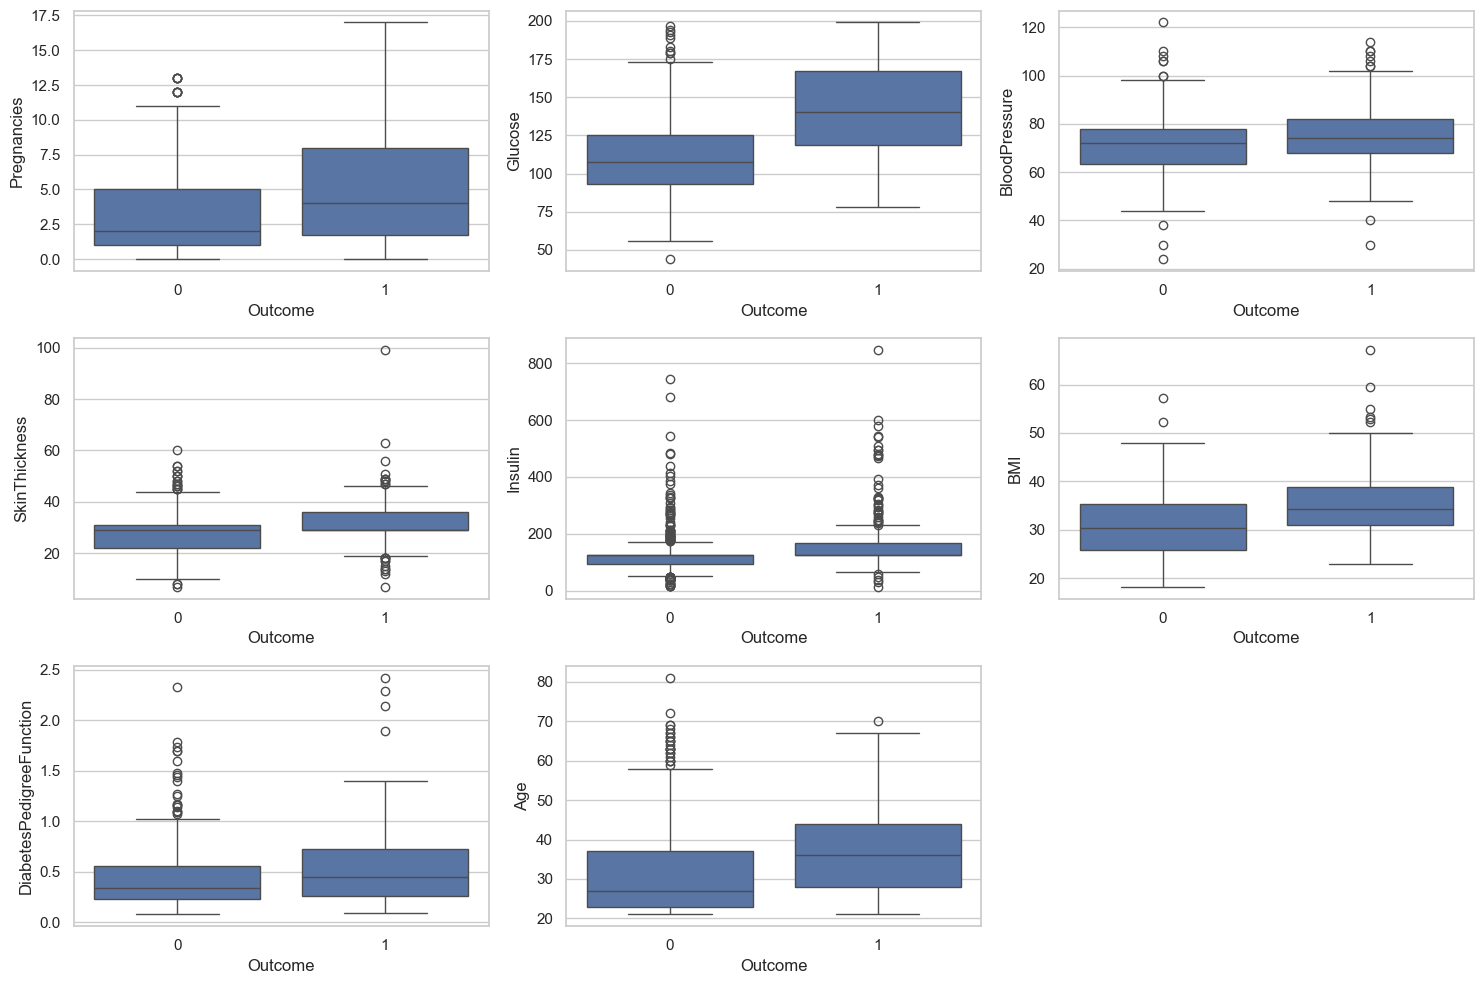

In [50]:
# Boxplots for features by Outcome
features = df.columns[:-1]
plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.tight_layout()
plt.show()

## Pairplot of Features

Visualize relationships between features and the target using pairplot.


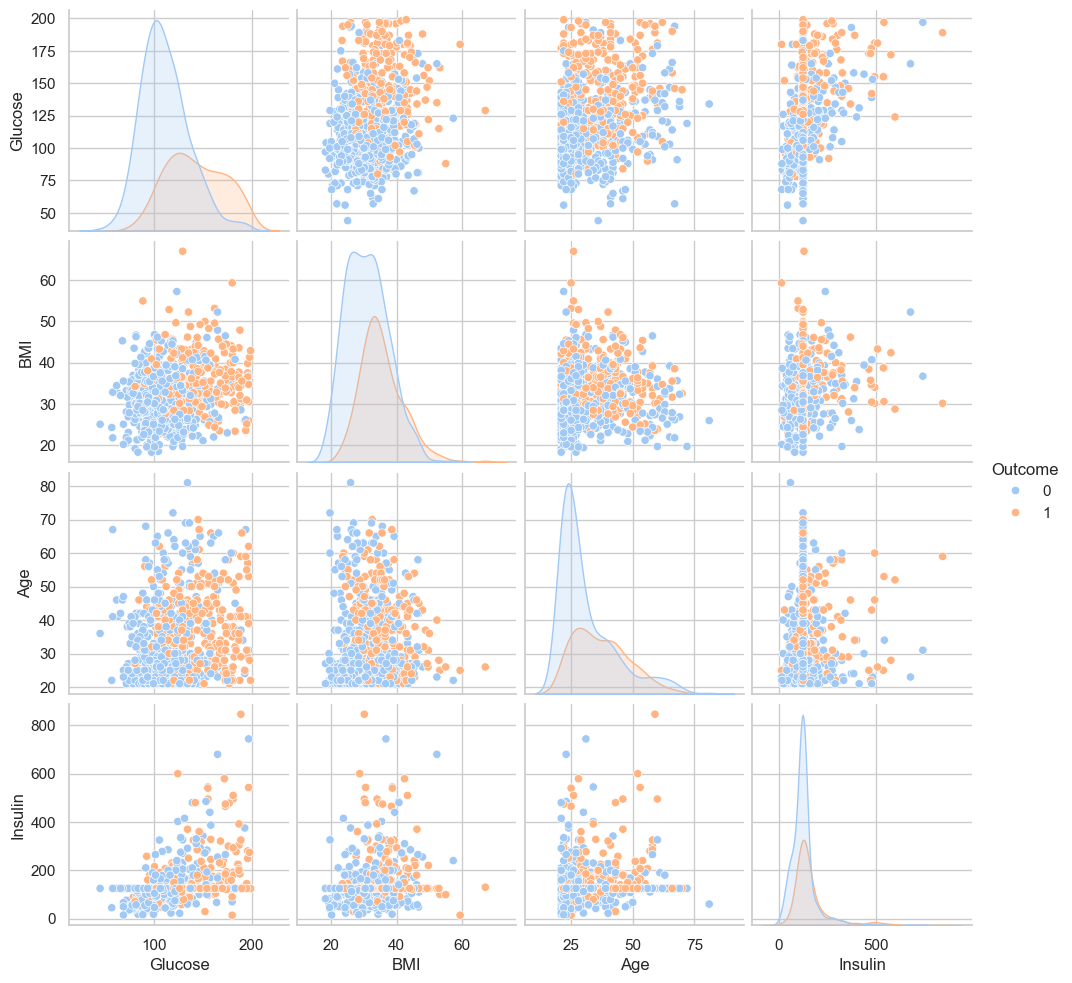

In [51]:
# Due to large size, limit pairplot to selected important features
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
sns.pairplot(df[selected_features], hue='Outcome', palette='pastel')
plt.show()


## Feature Selection

Use all features for modeling as correlation analysis shows multiple features contribute to predicting diabetes.


In [52]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


## Split Dataset

Split the data into training (80%) and testing (20%) sets to evaluate model performance.


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Feature Scaling

Standardize features to ensure all features contribute equally to the model.


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train Logistic Regression

Train a Logistic Regression model to classify patients as diabetic or non-diabetic.


In [55]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)


## Feature Importance

Visualize the importance of features using coefficients from the trained Logistic Regression model.

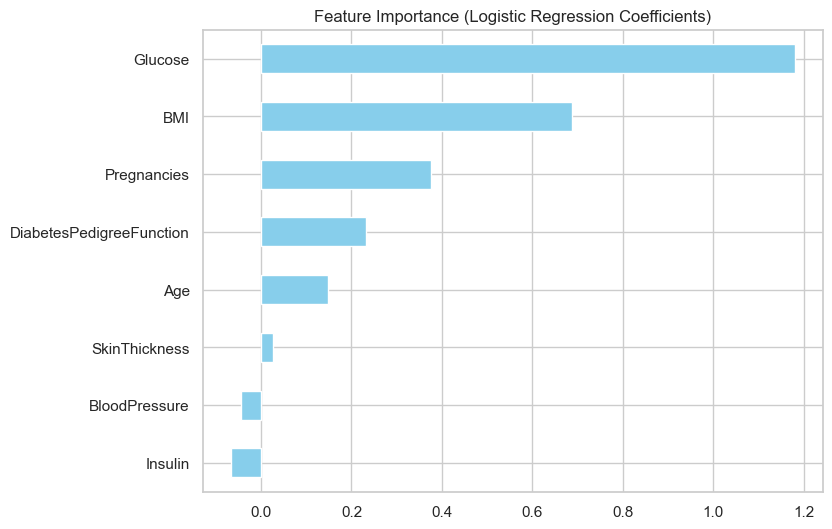

In [56]:
coef = pd.Series(lr_model.coef_[0], index=X.columns)
coef.sort_values().plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()


## Model Evaluation

Evaluate the model using accuracy, confusion matrix, classification report, and ROC-AUC.


Accuracy: 0.6948


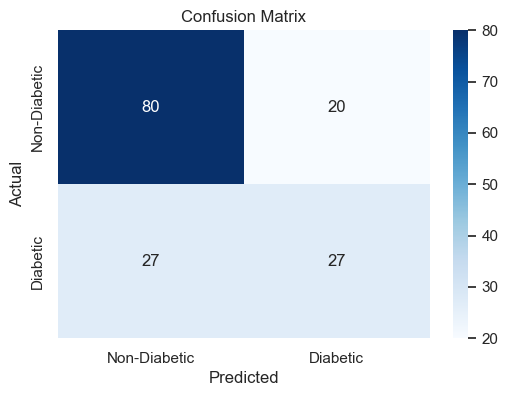

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic','Diabetic'], yticklabels=['Non-Diabetic','Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


## ROC Curve & AUC

Visualize model's ability to distinguish between diabetic and non-diabetic patients.


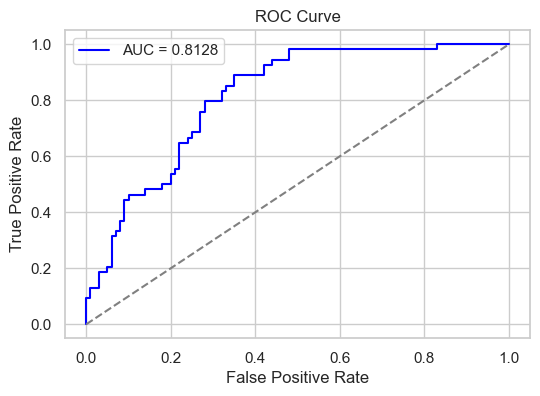

In [58]:
y_prob = lr_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Insights

- Logistic Regression was able to classify the data with good accuracy.
- Features such as glucose level and BMI had a strong influence on the prediction.
- Replacing invalid zero values improved data quality.
- Feature scaling helped the model perform better and converge faster.
- The model evaluation metrics indicate that the approach is suitable for this dataset.
